In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import *
from math import factorial

# Lagrange Polynomial Interpolation

Ejercicio 7a

In [2]:
def Lagrange(X):
  pass


def LagrangeInter(X,Y):
  """
  takes as input an array of x_0,...,x_n and y_0,y_1,...,y_n and returns the coefficients of interpolation polynomial
  """
  pass


In [3]:
from scipy.interpolate import lagrange

In [4]:
x = [-2,-1,2,3]
y = [4,1,4,9]
lagrange(x,y)
PL_1 = [1,0,0]

In [5]:
x = [0, 1, 3, 5]
y = [1, 2, 3, 4]
lagrange(x,y)
#PL_2 = []

poly1d([ 0.03333333, -0.3       ,  1.26666667,  1.        ])

Diferencias divididas:



In [6]:
def div_dif(x,y):
    """
    computes the coefficients of a Lagrange polynomial using divided differences
    
    parameters
    ----------
    x : array. abscisa points
    y : array. the values of some function f at the points x's
    """
    n = len(x)
    a = np.zeros((n,n))
    a[:, 0] = y   # the first column is [f_00,f_10,...,f_n1]=[f(x_0), f(x_1),...,f(x_n)] 
  

    for i in range(1,n):  
        for j in range(1,i+1):
          a[i, j] = (a[i, j-1]- a[i-1, j-1])/(x[i] - x[i-j]) 

    return np.diag(a)


# A more pythonic way is:

def coeff(x,y):
    """
    computes the coefficients of a Lagrange polynomial using divided differences
    
    parameters
    ----------
    x : array. abscisa points
    y : array. the values of some function f at the points x's
    """
    a = np.array(y, dtype = float)
    x = np.array(x, dtype = float)
    n = len(x)
    for i in range(1,n):  
        a[i:] = (a[i:]- a[i-1])/(x[i:] - x[i-1]) # more pythonic...voy dividiendo coordenada a coordenada
    return a

def Eval(a,x_data,x):
    
    d = len(x_data) - 1 # degree of p
    p = a[d]
    for i in range(1,d+1):
        p = a[d-i] + (x - x_data[d-i])*p
    
    return p

In [7]:
x = np.array([-2,-1,2,3])
y = [4,1,4,9]
print(div_dif(x,y))

a = coeff(x,y)
#X = np.linspace()
Eval(a, x, x) == y


[ 4. -3.  1.  0.]


array([ True,  True,  True,  True])

$f(x) =\sin(\pi x)$ for $x\in[0,1/2]$ find $P_3(x)$

In [8]:
x = np.array([0, 1/4, 1/2])
y = [0, np.sqrt(2)/2, 1]
a = coeff(x,y) # los coefs de diferencias divs

P_3 = lambda z: Eval(a, x,z)

Plotting the polynomial

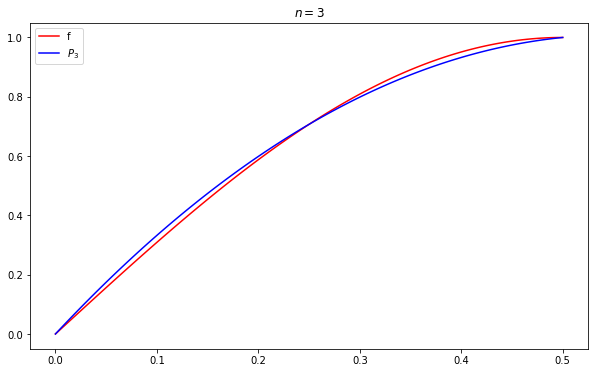

In [9]:
f = lambda x: np.sin(np.pi*x)

grid = np.linspace(0,1/2,100)

plt.figure(figsize = (10,6))
plt.plot(grid, f(grid), color = 'red', label = 'f')
plt.plot(grid, P_3(grid), color = 'blue', label = '$P_3$')
plt.legend()
plt.title('$n = 3$')
plt.show()

# Computing the distance between $f$ and $P_3$

In [10]:
grid = np.linspace(0,1/2,1000)
np.max(np.abs(f(grid)-P_3(grid)))

0.023536836016851304

## Ejercicio 11 Pract 1

En una planta quımica se sintetiza un producto que es utilizado posteriormente como conservante de
productos enlatados. El rendimiento del proceso depende de la temperatura.
Se dispone de los siguientes datos

In [11]:
T = [150, 160, 170, 180, 190, 200, 210]
R = [35.5, 37.8, 43.6, 45.7, 47.3, 50.1, 51.2]
P = lagrange(T, R)
t = 162
R_est = np.polyval(P, t)
print(R_est)


39.201065037050284


## Ejercicio 14:
Para $n=9,11, 13$ graficar simultaneamente $W_{n+1}=\displaystyle\prod_{i=1}^n(x-x_i)$ donde $x_{i}=-1+\frac{2 i}{n}$, $i=0, \ldots, n$ y el polinomio $T_{n+1} / 2^{n}$ donde $T_{n+1}$ es el $(n+1)$-ésimo polinomio de Chebyshev.

Definimos primero los Chebyshev recursivamente:

In [12]:
def Tcheby(k,x):
    
    if k == 0:
        T = 1
    elif k == 1:
        T = x
    else: 
        T = 2*x*Tcheby(k-1,x) - Tcheby(k-2,x)
    return T

Para los polinomios $W_n$ usamos la función \text{np.poly} que calcula los coeficientes de $W$ conociendo las raices por ejemplo.

In [13]:
#@title

W = []
T = []
degs = [5, 11,13]
grid = np.linspace(-1,1,100)


for n in degs:
  x_data = np.array([-1 + 2*i/n for i in range(n+1)])
  coeff_W = np.poly(x_data)
  W_eval = lambda x: np.polyval(coeff_W, x)
  W.append(W_eval(grid))
  
  # para los coeficientes de $T_9$:
  T_roots = np.array([np.cos((2*i +1)*np.pi/(2*n+2)) for i in range(n+1)])
  coeff_T = np.poly(T_roots)
  T_eval = lambda x: 2**n*np.polyval(coeff_T,x) # chebyscehv monico
  T.append(T_eval(grid))





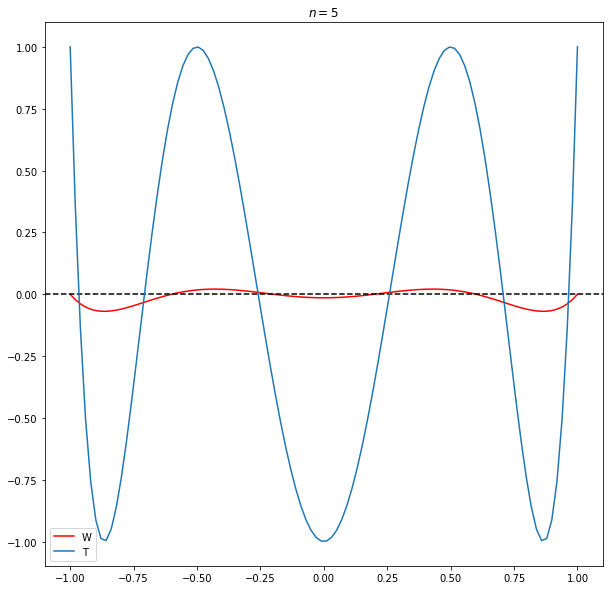

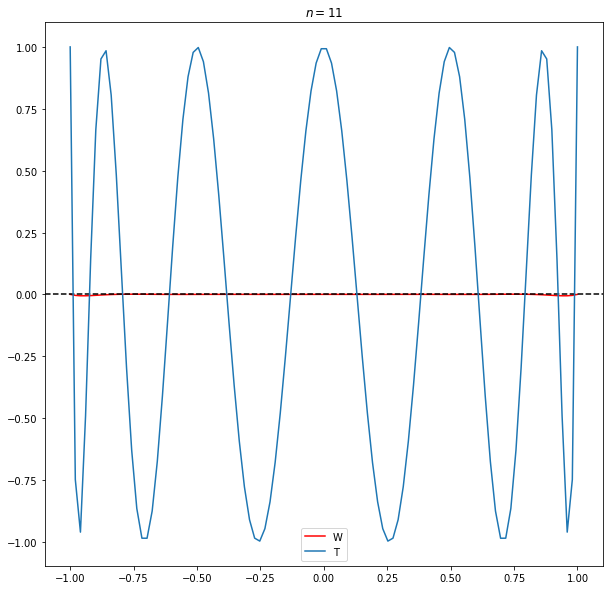

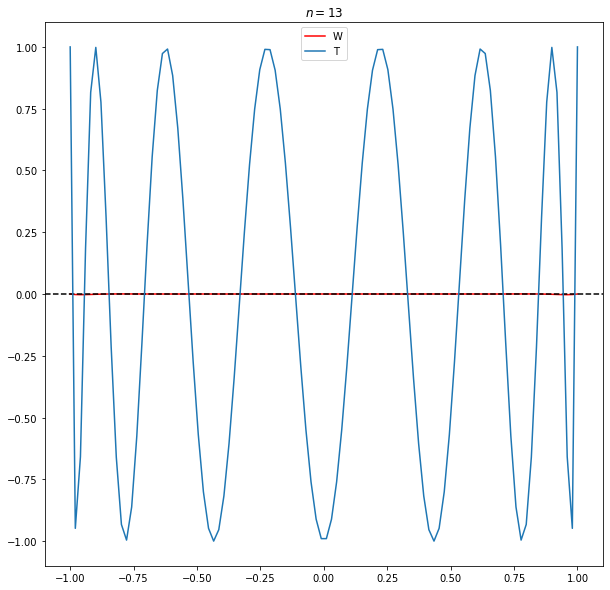

In [14]:
for (i,n) in enumerate(degs):

  plt.figure(figsize = (10,10))
  plt.plot(grid, W[i], label = 'W', color = "red")
  plt.axhline(0, color = 'black', linestyle ="--")
  plt.plot(grid, T[i], label = 'T')
  plt.title('$n = $' + str(n))
  plt.legend()
  plt.show()

# otra forma que parece funcionar! a manopla!

---



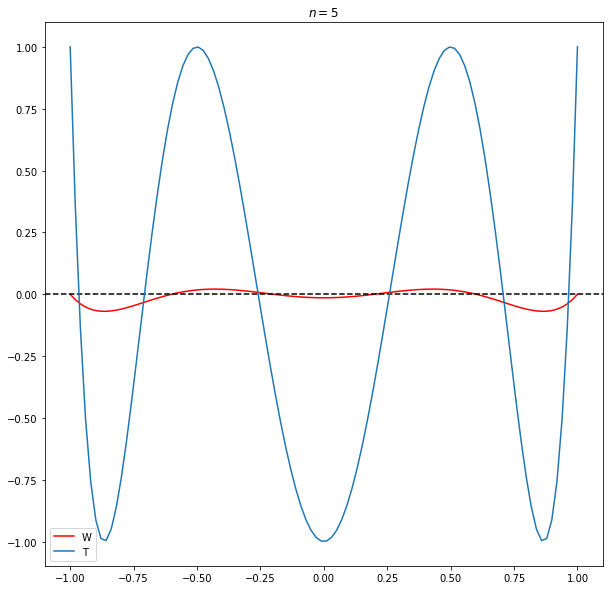

In [15]:
n = 5
x_data = np.array([-1 + 2*i/n for i in range(n+1)])
coeff_W = np.poly(x_data)
W = lambda x: np.polyval(coeff_W, x)
T_roots = np.array([np.cos((2*i +1)*np.pi/(2*n+2)) for i in range(n+1)])
coeff_T = np.poly(T_roots)
T = lambda x: 2**n*np.polyval(coeff_T,x)  # chebyscehv monico
grid = np.linspace(-1,1,100)
plt.figure(figsize = (10,10))
plt.plot(grid, W(grid), label = 'W', color = "red")
plt.axhline(0, color = 'black', linestyle ="--")
plt.plot(grid, T(grid), label = 'T')
plt.title('$n = $' + str(n))
plt.legend()
plt.show()

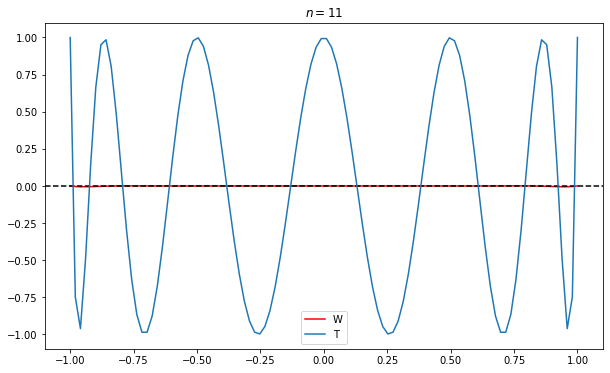

In [16]:
n = 11
x_data = np.array([-1 + 2*i/n for i in range(n+1)])
coeff_W = np.poly(x_data)
W = lambda x: np.polyval(coeff_W, x)
T_roots = np.array([np.cos((2*i +1)*np.pi/(2*n+2)) for i in range(n+1)])
coeff_T = np.poly(T_roots)
T = lambda x: 2**n*np.polyval(coeff_T,x)  # chebyscehv monico
grid = np.linspace(-1,1,100)
plt.figure(figsize = (10,6))
plt.plot(grid, W(grid), label = 'W', color = "red")
plt.axhline(0, color = 'black', linestyle ="--")
plt.plot(grid, T(grid), label = 'T')
plt.title('$n = $' +str(n))
plt.legend()
plt.show()

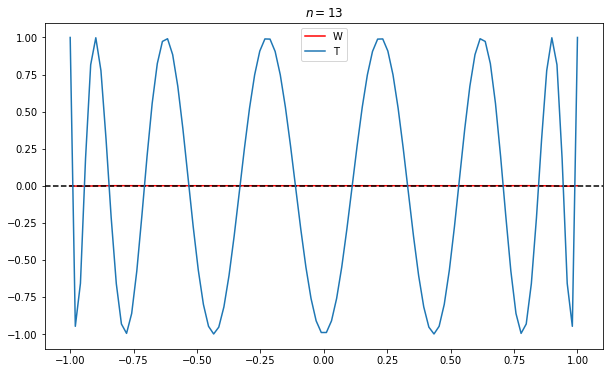

In [17]:
n = 13
x_data = np.array([-1 + 2*i/n for i in range(n+1)])
coeff_W = np.poly(x_data)
W = lambda x: np.polyval(coeff_W, x)
T_roots = np.array([np.cos((2*i +1)*np.pi/(2*n+2)) for i in range(n+1)])
coeff_T = np.poly(T_roots)
T = lambda x: 2**n*np.polyval(coeff_T,x)  # chebyscehv monico
grid = np.linspace(-1,1,100)
plt.figure(figsize = (10,6))
plt.plot(grid, W(grid), label ='W', color ="red")
plt.axhline(0, color = 'black', linestyle = "--")
plt.plot(grid, T(grid), label='T')
plt.title('$n = $' +str(n))
plt.legend()
plt.show()

## Ejercicio 15: Ploteamos la cota del error usando nodos equiespaciados:

$$
|E_n(x)|\leq \frac{(n+2)!}{n^{n+1}}2^{n+1}
$$

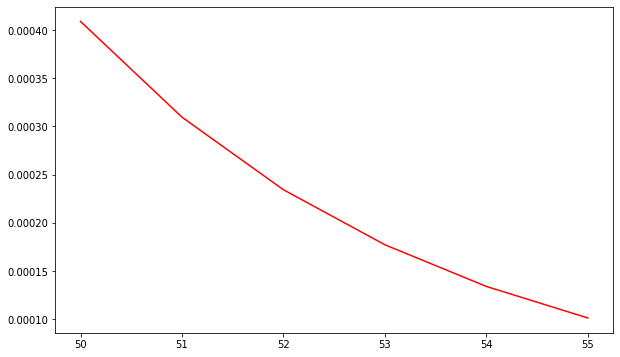

para n = 55 la cota es : 0.00010118420861260168


In [18]:
from scipy.special import factorial
# esta funcion calcula el factoria de arrays no solo de escalares enteros

n = np.array(range(50, 56))
C = lambda x: factorial(x+2)*(2/x)**(x+1)

plt.figure(figsize = (10,6))
plt.plot(n, C(n), label ='C', color ="red")
plt.show()

print("para n = " + str(n[-1]) + " la cota es : "+ str(C(n[-1])))

# Interpolacion de Hermite:

## {Polinomios de Hermite usando diferencias divididas}
Existe un método alterno para generar aproximaciones de Hermite que tiene sus bases en la fórmula de diferencias divididas de interpolación de Newton (3.10) en $x_{0}, x_{1}, \ldots, x_{n}$; esto es,

$$
P_{n}(x)=f\left[x_{0}\right]+\sum_{k=1}^{n} f\left[x_{0}, x_{1}, \ldots, x_{k}\right]\left(x-x_{0}\right) \cdots\left(x-x_{k-1}\right) .
$$

El método alterno utiliza la conexión entre la enésima diferencia dividida y la enésima derivada de $f$, como se describe en el teorema $3.6$ en la sección 3.3.

Suponga que los diferentes números $x_{0}, x_{1}, \ldots, x_{n}$ están dados junto con los valores de $f$ y $f^{\prime}$ en estos números. Defina una nueva sucesión $z_{0}, z_{1}, \ldots, z_{2 n+1}$ mediante

$$
z_{2 i}=z_{2 i+1}=x_{i}, \quad \text { para cada } i=0,1, \ldots, n,
$$

y construya la tabla de diferencias divididas en la forma de la tabla $3.9$ que usa $z_{0}, z_{1}, \ldots$, $z_{2 n+1}$.

Puesto que $z_{2 i}=z_{2 i+1}=x_{i}$ para cada $i$, no podemos definir $f\left[z_{2 i}, z_{2 i+1}\right]$ con la fórmula de diferencias divididas. Sin embargo, si suponemos, con base en el teorema 3.6, que la sustitución razonable en estas situaciones es $f\left[z_{2 i}, z_{2 i+1}\right]=f^{\prime}\left(z_{2 i}\right)=f^{\prime}\left(x_{i}\right)$, podemos usar las entradas

$$
f^{\prime}\left(x_{0}\right), f^{\prime}\left(x_{1}\right), \ldots, f^{\prime}\left(x_{n}\right)
$$

en lugar de las primeras diferencias divididas no definidas

$$
f\left[z_{0}, z_{1}\right], f\left[z_{2}, z_{3}\right], \ldots, f\left[z_{2 n}, z_{2 n+1}\right] .
$$

Las diferencias divididas restantes se producen de la manera común y las diferencias divididas adecuadas se usan en la fórmula de diferencias divididas de interpolación de Newton. La tabla $3.16$ muestra las entradas que se utilizan para las primeras tres columnas de diferencias divididas al determinar el polinomio de Hermite $H_{5}(x)$ para $x_{0}, x_{1}$ y $x_{2}$. Las entradas restantes se generan de la manera que se muestra en la tabla 3.9. El polinomio de Hermite está dado por

$$
H_{2 n+1}(x)=f\left[z_{0}\right]+\sum_{k=1}^{2 n+1} f\left[z_{0}, \ldots, z_{k}\right]\left(x-z_{0}\right)\left(x-z_{1}\right) \cdots\left(x-z_{k-1}\right) .
$$

Una prueba de este hecho puede encontrarse en [Pow], p. 56

Tabla $3.16$

<center/>
<img src="https://www.overleaf.com/project/63e0e31d6e7593201d30faab/file/63e0e31d6e75934f3530fab0">
<center/>
